## MIDS - Spotify Base Data Review

In [2]:
## to mount GoogleDrive
from google.colab import drive
import os 
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/to_mount')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# base modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection
import sklearn.metrics

# non-base no import
from pathlib import Path
from bs4 import BeautifulSoup
#from lyricsgenius import Genius
import requests
import seaborn as sns
import json
import xgboost as xgb
import os
import re

In [4]:
#!pip install spotipy
#!pip install pymusixmatch

In [5]:
# import packages
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from musixmatch import Musixmatch
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

In [6]:
nltk.download(["names","stopwords","state_union","twitter_samples","movie_reviews", "averaged_perceptron_tagger","vader_lexicon","punkt"])

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
#Spotify creds
cid = Path('_keys/cid.txt').read_text()
secret = Path('_keys/secret.txt').read_text()

#Genius creds
# genius_cid = Path('_keys/genius_cid.txt').read_text()
# genius_secret = Path('_keys/genius_secret.txt').read_text()

#Musixmatch creds
musix_cid = Path('_keys/musix_id.txt').read_text()

In [8]:
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# genius = Genius(genius_cid)

In [9]:
genres = pd.read_csv('_data/genres_v2.csv')
playlist = pd.read_csv('_data/playlists.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
genres['genre'].value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

In [ ]:
## subset to just electro-related count
use_genres = ['Underground Rap', 'Hiphop', 'Rap']

use_songs = genres[genres.genre.isin(use_genres)]

In [ ]:
unique_uri = use_songs['uri'].unique()

In [ ]:
## get song popularity
def popularity(df):
    empty = []
    for i in df:
      print(i)
      series_track = pd.Series(sp.track(i))
      empty.append(series_track)
    df2 = pd.DataFrame(empty)
    return df2

electro_popularity = popularity(unique_uri)

In [ ]:
electro_popularity

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,221596,True,{'isrc': 'QZMEN2016068'},{'spotify': 'https://open.spotify.com/track/2M...,https://api.spotify.com/v1/tracks/2MKznt3SBUur...,2MKznt3SBUurI2dhGBhgKG,False,Midnight $pecial,0,https://p.scdn.co/mp3-preview/fc011f49b21776fb...,1,track,spotify:track:2MKznt3SBUurI2dhGBhgKG
1,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,169254,True,{'isrc': 'QZHNC2012043'},{'spotify': 'https://open.spotify.com/track/0G...,https://api.spotify.com/v1/tracks/0GpHpTBnQ1VZ...,0GpHpTBnQ1VZdlfyBGeoKr,False,IDK,16,https://p.scdn.co/mp3-preview/9ab1ae3e08ab1f85...,1,track,spotify:track:0GpHpTBnQ1VZdlfyBGeoKr
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,[],1,152772,True,{'isrc': 'QZMHP2080017'},{'spotify': 'https://open.spotify.com/track/7i...,https://api.spotify.com/v1/tracks/7in64eGZcfSb...,7in64eGZcfSb6Ag9modv0f,False,KILL THEM ALL,29,None,3,track,spotify:track:7in64eGZcfSb6Ag9modv0f
3,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,158824,True,{'isrc': 'QZNWQ2097021'},{'spotify': 'https://open.spotify.com/track/7p...,https://api.spotify.com/v1/tracks/7pR6pkqITDQS...,7pR6pkqITDQSGhSJOzRjWh,False,Destiny,3,https://p.scdn.co/mp3-preview/ef98d7a6122e1364...,1,track,spotify:track:7pR6pkqITDQSGhSJOzRjWh
4,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,[],1,145681,True,{'isrc': 'QZNMU2069069'},{'spotify': 'https://open.spotify.com/track/1x...,https://api.spotify.com/v1/tracks/1xWbHRmEAvMX...,1xWbHRmEAvMXT9nnUtRJM8,False,Trife,0,None,1,track,spotify:track:1xWbHRmEAvMXT9nnUtRJM8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,281885,True,{'isrc': 'US6R21496285'},{'spotify': 'https://open.spotify.com/track/54...,https://api.spotify.com/v1/tracks/54v6Kv41W8AK...,54v6Kv41W8AKToCb14PmJD,False,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &...",39,https://p.scdn.co/mp3-preview/c6c1c54a165f9b0a...,3,track,spotify:track:54v6Kv41W8AKToCb14PmJD
9678,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,209581,True,{'isrc': 'QM6MZ2095135'},{'spotify': 'https://open.spotify.com/track/4Y...,https://api.spotify.com/v1/tracks/4YuGxSdxyL6f...,4YuGxSdxyL6fRD7uchn9dI,False,Daddy's Girl,15,https://p.scdn.co/mp3-preview/b1bb7477773c816f...,7,track,spotify:track:4YuGxSdxyL6fRD7uchn9dI
9679,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,213898,True,{'isrc': 'QM6MZ2095142'},{'spotify': 'https://open.spotify.com/track/03...,https://api.spotify.com/v1/tracks/034dSXepspHa...,034dSXepspHaYFW7rZZx1d,False,'94,22,https://p.scdn.co/mp3-preview/aca9ff38963fff0f...,14,track,spotify:track:034dSXepspHaYFW7rZZx1d
9680,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,271866,True,{'isrc': 'US6R21482692'},{'spotify': 'https://open.spotify.com/track/7o...,https://api.spotify.com/v1/tracks/7oCZpPJcPDZf...,7oCZpPJcPDZfeIy2t6gqSg,False,Born 2 Live,39,https://p.scdn.co/mp3-preview/da9dfa06250ce3d8...,4,track,spotify:track:7oCZpPJcPDZfeIy2t6gqSg


In [ ]:
electro_popularity.to_csv('hiphop_pull.csv')

In [11]:
electro_popularity = pd.read_csv('hiphop_pull.csv')

Plot distribution of popularity score.

[Text(0.5, 1.0, 'Total Popularity Distribution')]

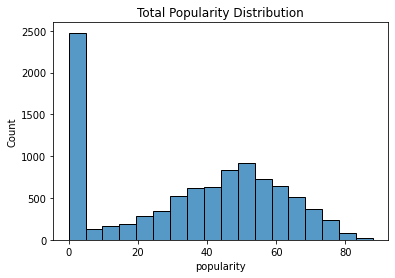

In [ ]:
sns.histplot(data = electro_popularity
            ,x = 'popularity'
            ).set(title='Total Popularity Distribution')

[Text(0.5, 1.0, 'Non-0 Popularity Distribution')]

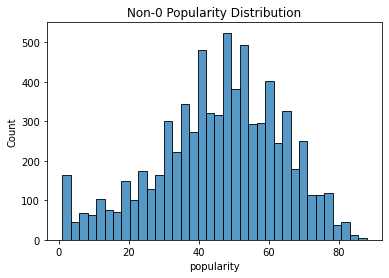

In [ ]:
sns.histplot(data = electro_popularity.loc[electro_popularity['popularity'] > 0]
            ,x = 'popularity'
            ).set(title='Non-0 Popularity Distribution')

In [12]:
## remove any songs with no popularity - assuming these are too small to be considered
electro_short = electro_popularity.loc[electro_popularity['popularity'] > 0]

In [13]:
# parse artist names from JSON response
def parse_artist(df):
  empty = []
  for i in df['artists']:
    line_artists = []
    try:
      artist_lists = json.loads(i.replace("\'", "\""))
    except:
      #print(i)
      artists_lists = []
    for j in artist_lists:
      line_artists.append(j['name'])
    empty.append(line_artists)
  return empty


electro_short['artist_names'] = parse_artist(electro_short)
electro_short['first_artist'] = electro_short.apply(lambda row: row.artist_names[0], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
out = pd.DataFrame(electro_short.first_artist.value_counts())
out

,first_artist
BONES,136
Pouya,88
Xavier Wulf,70
Ghostemane,68
Kendrick Lamar,68
...,...
Jefe Wit The Shot,1
Fijimacintosh,1
Coi Leray,1
The Execs,1


[Text(0.5, 1.0, 'Arist Song Count')]

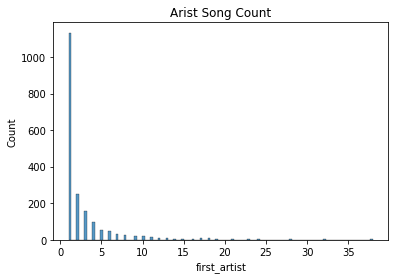

In [ ]:
sns.histplot(data = out.loc[out['first_artist'] < 40]
            ,x = 'first_artist'
            ).set(title='Arist Song Count')

In [ ]:
use_cols = ['href', 'popularity', 'name', 'first_artist']
electro_short_join = electro_short[use_cols]

In [ ]:
electro_short_join

,href,popularity,name,first_artist
1,https://api.spotify.com/v1/tracks/0GpHpTBnQ1VZ...,16,IDK,NERGRISEN
2,https://api.spotify.com/v1/tracks/7in64eGZcfSb...,29,KILL THEM ALL,Undead Ronin
3,https://api.spotify.com/v1/tracks/7pR6pkqITDQS...,3,Destiny,Marco
5,https://api.spotify.com/v1/tracks/5Qt9JOhdYDkH...,9,My Time,JANTU
7,https://api.spotify.com/v1/tracks/5Vh9ObRtwoIk...,2,OMG,Lil MC
...,...,...,...,...
9675,https://api.spotify.com/v1/tracks/5zEoohLO20of...,5,Get $ Paid,Tha Dogg Pound
9677,https://api.spotify.com/v1/tracks/54v6Kv41W8AK...,39,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &...",Apollo Brown
9678,https://api.spotify.com/v1/tracks/4YuGxSdxyL6f...,15,Daddy's Girl,Apollo Brown
9679,https://api.spotify.com/v1/tracks/034dSXepspHa...,22,'94,Apollo Brown


In [ ]:
genres_joined = pd.merge(genres.drop('genre', axis=1).drop_duplicates(), 
                         electro_short_join.drop_duplicates(),
                         left_on='track_href', right_on='href', how='left')
genres_joined_electro = genres_joined.loc[~pd.isna(genres_joined.first_artist)]

In [ ]:
genres_joined_electro.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'song_name', 'Unnamed: 0', 'title', 'href',
       'popularity', 'name', 'first_artist'],
      dtype='object')

In [ ]:
agg_cols = {'danceability':'mean',
            'energy':'mean',
            'key': 'mean',
            'loudness':'mean',
            #'mode':'mean',
            'speechiness':'mean',
            'acousticness':'mean',
            'instrumentalness':'mean',
            'liveness': 'mean',
            'valence':'mean',
            'tempo':'mean',
            'popularity': 'mean'}

electro_agg_metrics = genres_joined_electro.groupby('first_artist').agg(agg_cols)

In [ ]:
electro_agg_metrics

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
first_artist,,,,,,,,,,,
$NOT,0.724089,0.519844,4.644444,-9.405511,0.274020,0.353913,0.041001,0.171944,0.419271,158.485844,50.933333
$US VALENTINO,0.733000,0.558000,1.000000,-9.513000,0.084700,0.040000,0.000105,0.333000,0.290000,157.945000,37.000000
$atori Zoom,0.843250,0.624875,2.500000,-7.230125,0.167013,0.127350,0.006667,0.207763,0.415875,176.350250,44.750000
$hun,0.808000,0.488000,9.000000,-10.927000,0.446000,0.727000,0.000000,0.110000,0.482000,184.142000,29.000000
$onoma,0.739000,0.806000,8.000000,-5.756000,0.101000,0.056600,0.000066,0.088400,0.152000,129.925000,29.000000
...,...,...,...,...,...,...,...,...,...,...,...
whiterosemoxie,0.829000,0.539000,2.000000,-7.625000,0.185000,0.029200,0.000000,0.148000,0.335000,119.950000,51.000000
windchILL,0.738000,0.860000,11.000000,-4.077000,0.263000,0.204000,0.000000,0.212000,0.837000,185.984000,34.000000
woodsordeath,0.778000,0.599000,1.000000,-7.609000,0.199500,0.040090,0.000000,0.296500,0.217050,127.536500,33.000000


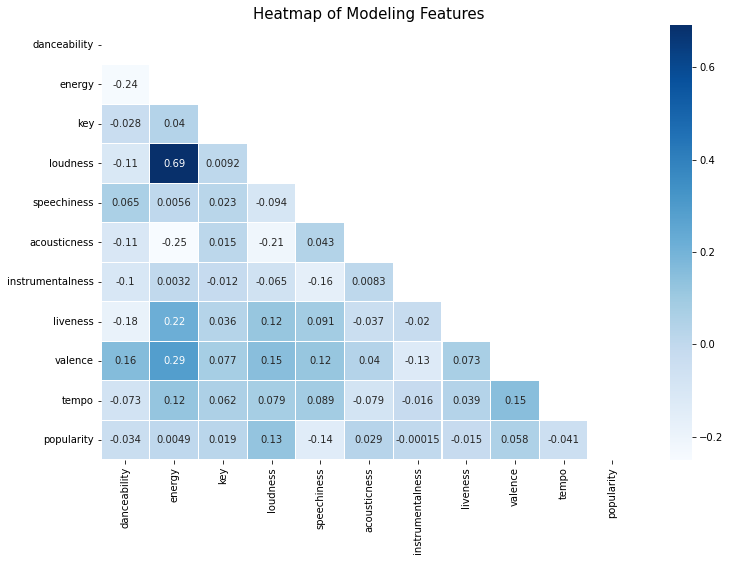

In [ ]:
corr = electro_agg_metrics.corr()

fig, ax = plt.subplots(figsize = (12,8))

sns.heatmap(corr, mask = np.triu(np.ones_like(corr, dtype = bool)), cmap = 'Blues', annot = True, 
           linewidths = .2)

plt.title('Heatmap of Modeling Features', fontsize = 15)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(electro_agg_metrics.drop('popularity', axis = 1), 
                                                                            electro_agg_metrics.popularity,
                                                    random_state = 1111,
                                                    test_size = 0.3)

In [27]:
## Create dictionary to track model results
results = {}

def add_results(y_pred, model_name):
    ## Add results of test data to tracker, with user input to ensure data is overwritten on purpose
    if model_name in results.keys():
        userIn = input("Model already in dictionary. Add? ").lower()
        if userIn == 'yes':
            results[model_name] = round(sklearn.metrics.mean_squared_error(y_test, y_pred), 2)**.5
        else:
            pass
    else:
        results[model_name] = round(sklearn.metrics.mean_squared_error(y_test, y_pred), 2)**.5
    print(results)

In [ ]:
XGB_MVP = xgb.XGBRegressor(objective='reg:squarederror',
                                seed=100).fit(X_train, y_train)
add_results(XGB_MVP.predict(X_test), "XGB_Base")

{'XGB_Base': 17.40718242565407}


In [ ]:
## Run GridSearchCV on max_depth, min_child_weight, n_estimators, and subsample

param_test = {
 'max_depth':range(2,5,1),
 'min_child_weight':range(3,10,2),
 'subsample':[i/100.0 for i in range(70,90,5)],
 'n_estimator':range(150,300,50)
}

gsearch1 = sklearn.model_selection.GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', eta=0.025,
                                                                           seed=100),param_grid=param_test, 
                                                                           cv=4)
gsearch1.fit(X_train, y_train)
gsearch1.best_estimator_

XGBRegressor(eta=0.025, max_depth=2, min_child_weight=3, n_estimator=150,
             objective='reg:squarederror', seed=100, subsample=0.75)

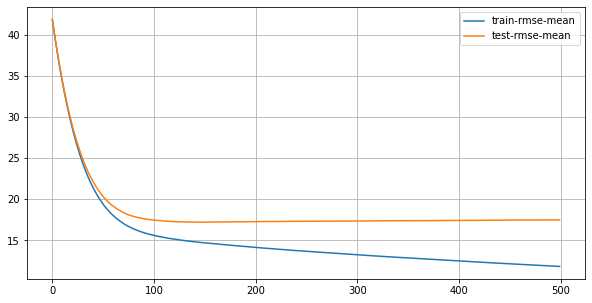

In [ ]:
## Select final number of estimators
params = {'eta':0.025, 'seed':100, 
         'max_depth':3, 'min_child_weight':3, 'subsample':0.75, 'objective':'reg:squarederror'}

## Run CV to determine the number of round
CVRun = xgb.cv(
            params=params,
            dtrain=xgb.DMatrix(X_train, label=y_train),
            num_boost_round=500,
            nfold=4,
            metrics='rmse',
            seed=100)

CVRun.drop(['train-rmse-std', 'test-rmse-std'], axis=1, inplace=True)
CVRun.plot(figsize = (10,5), grid = True)

In [ ]:
## Selected 300 as the number of rounds to avoid over fitting

XGB_hyperparam = xgb.train(params, xgb.DMatrix(X_train, label=y_train), 120)
add_results(XGB_hyperparam.predict(xgb.DMatrix(X_test)), "XGB_Hyperparam")

{'XGB_Base': 17.40718242565407, 'XGB_Hyperparam': 17.134759992483115}


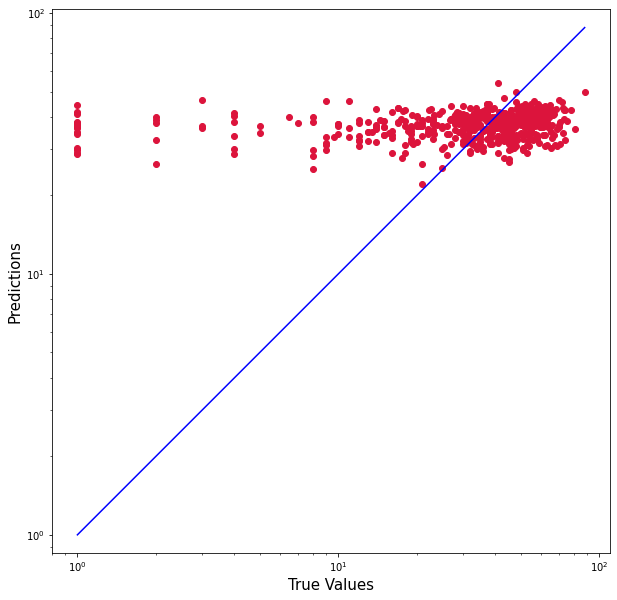

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, XGB_hyperparam.predict(xgb.DMatrix(X_test)), c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(XGB_hyperparam.predict(xgb.DMatrix(X_test))), max(y_test))
p2 = min(min(XGB_hyperparam.predict(xgb.DMatrix(X_test))), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## pull from MusixMatch

In [ ]:
genres_joined_electro.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,analysis_url,duration_ms,time_signature,song_name,Unnamed: 0,title,href,popularity,name,first_artist
0,0.831,0.814,2,-7.364,1,0.420,0.0598,0.01340,0.0556,0.389,...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Mercury: Retrograde,NaN,NaN,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,74.0,Mercury: Retrograde,Ghostemane
5,0.721,0.568,0,-11.295,1,0.414,0.0452,0.21200,0.1280,0.109,...,https://api.spotify.com/v1/audio-analysis/6fsy...,112511,4,Gatteka,NaN,NaN,https://api.spotify.com/v1/tracks/6fsypiJHyWme...,58.0,Gatteka,Ghostemane
8,0.774,0.751,1,-2.445,1,0.198,0.0614,0.00000,0.0728,0.189,...,https://api.spotify.com/v1/audio-analysis/37gq...,140326,4,I Put My Dick in Your Mental,NaN,NaN,https://api.spotify.com/v1/tracks/37gqBnUAZe8B...,51.0,I Put My Dick in Your Mental,gizmo
9,0.893,0.907,11,-10.406,1,0.367,0.1520,0.03110,0.5580,0.302,...,https://api.spotify.com/v1/audio-analysis/2ggq...,121979,4,Andromeda,NaN,NaN,https://api.spotify.com/v1/tracks/2ggqfj97qyiO...,61.0,Andromeda,Ghostemane
12,0.825,0.761,8,-5.389,1,0.104,0.0111,0.00359,0.3340,0.161,...,https://api.spotify.com/v1/audio-analysis/5o7Z...,163371,4,1000 Rounds,NaN,NaN,https://api.spotify.com/v1/tracks/5o7ZDvfOry1M...,68.0,1000 Rounds,Pouya


In [ ]:
musixmatch = Musixmatch(musix_cid)

def parse_lyrics(df):
  empty = []
  for row, artist in df.first_artist.iteritems():
    song_title = df['name'].loc[row]
    lyrics_return = ''
    #print(song_title)
    #print(artist)
    try:
      track_return = musixmatch.matcher_track_get(song_title, artist)
      if track_return['message']['body']['track']['has_lyrics'] == 1:
        lyrics_return = musixmatch.track_lyrics_get(track_return['message']['body']['track']['track_id'])['message']['body']['lyrics']['lyrics_body']
    except:
      lyrics_return = ''
    empty.append(lyrics_return)
  return empty

full_lyrics = parse_lyrics(genres_joined_electro)

In [ ]:
genres_joined_electro['lyrics'] = full_lyrics

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
## clean lyrics
genres_joined_electro['lyrics_clean'] = genres_joined_electro['lyrics'].str.replace('******* This Lyrics is NOT for Commercial use *******\n(1409622602394)', '',regex=False).str.replace('\n', ' ', regex=False)
genres_joined_electro['char_len'] = genres_joined_electro['lyrics_clean'].str.len()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
genres_joined_electro.to_csv('mapped_data_w_lyrics_hiphop.csv')

In [15]:
genres_joined_electro = pd.read_csv('mapped_data_w_lyrics_hiphop.csv')

In [16]:
# prep sentiment analysis
sia = SentimentIntensityAnalyzer()

In [17]:
def get_sentiment(df):
  empty = []

  for lyrics in df.lyrics_clean:

    if pd.isna(lyrics):
      lyrics = ''

    #print(lyrics)
    output = sia.polarity_scores(lyrics)
    empty.append(output)
    
  return empty

sentiment_scores = pd.DataFrame(get_sentiment(genres_joined_electro))
final_sentiment = pd.concat([genres_joined_electro.reset_index(), sentiment_scores.reset_index()], axis=1)

In [19]:
## bring in GloVe
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

glove_filename = 'glove.6B.50d.txt'

word2vec_output_file = glove_filename+'.word2vec'
glove2word2vec('glove.6B.50d.txt', word2vec_output_file)

# load the Stanford GloVe model
word2vec_output_file = glove_filename+'.word2vec'
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

In [20]:
v = model.get_vector('king')
D = v.shape[0]

X = np.zeros((len(final_sentiment.lyrics_clean), D))
n = 0
emptycount = 0

for sentence in final_sentiment.lyrics_clean:
  
  if pd.isna(sentence):
    sentence = ''
  
  tokens = sentence.split()
  vecs = []
  m = 0
  
  for word in tokens:
    
    try:
      # throws KeyError if word not found
      vec = model.get_vector(word)
      vecs = np.append(vecs, vec)
      m += 1
    except KeyError:
      pass
    
  if len(vecs) > 0:
    vecs = np.array(vecs)
    X[n] = vecs.mean(axis=0)
  else:
    emptycount += 1  
  n += 1

print(emptycount)
print(n)

1870
7643


In [21]:
df_GloVe = pd.DataFrame(X)
df_GloVe.columns = ['GloVe' + str(x) for x in range(50)]

final_sentiment2 = pd.concat([final_sentiment.reset_index(), df_GloVe.reset_index()], axis=1)

In [22]:
agg_cols = {'danceability':'mean',
            'energy':'mean',
            'key': 'mean',
            'loudness':'mean',
            #'mode':'mean',
            'speechiness':'mean',
            'acousticness':'mean',
            'instrumentalness':'mean',
            'liveness': 'mean',
            'valence':'mean',
            'tempo':'mean',
            'neg':'mean',
            'neu':'mean',
            'pos':'mean',
            'compound':'mean',
            'GloVe0': 'mean',
            'GloVe1': 'mean',
            'GloVe2': 'mean',
            'GloVe3': 'mean',
            'GloVe4': 'mean',
            'GloVe5': 'mean',
            'GloVe6': 'mean',
            'GloVe7': 'mean',
            'GloVe8': 'mean',
            'GloVe9': 'mean',
            'GloVe10': 'mean',
            'GloVe11': 'mean',
            'GloVe12': 'mean',
            'GloVe13': 'mean',
            'GloVe14': 'mean',
            'GloVe15': 'mean',
            'GloVe16': 'mean',
            'GloVe17': 'mean',
            'GloVe18': 'mean',
            'GloVe19': 'mean',
            'GloVe20': 'mean',
            'GloVe21': 'mean',
            'GloVe22': 'mean',
            'GloVe23': 'mean',
            'GloVe24': 'mean',
            'GloVe25': 'mean',
            'GloVe26': 'mean',
            'GloVe27': 'mean',
            'GloVe28': 'mean',
            'GloVe29': 'mean',
            'GloVe30': 'mean',
            'GloVe31': 'mean',
            'GloVe32': 'mean',
            'GloVe33': 'mean',
            'GloVe34': 'mean',
            'GloVe35': 'mean',
            'GloVe36': 'mean',
            'GloVe37': 'mean',
            'GloVe38': 'mean',
            'GloVe39': 'mean',
            'GloVe40': 'mean',
            'GloVe41': 'mean',
            'GloVe42': 'mean',
            'GloVe43': 'mean',
            'GloVe44': 'mean',
            'GloVe45': 'mean',
            'GloVe46': 'mean',
            'GloVe47': 'mean',
            'GloVe48': 'mean',
            'GloVe49': 'mean',
            'popularity': 'mean'}

electro_agg_metrics = final_sentiment2.groupby('first_artist').agg(agg_cols)

electro_agg_metrics

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,GloVe41,GloVe42,GloVe43,GloVe44,GloVe45,GloVe46,GloVe47,GloVe48,GloVe49,popularity
first_artist,,,,,,,,,,,,,,,,,,,,,
$NOT,0.724089,0.519844,4.644444,-9.405511,0.274020,0.353913,0.041001,0.171944,0.419271,158.485844,...,0.033695,0.033695,0.033695,0.033695,0.033695,0.033695,0.033695,0.033695,0.033695,50.933333
$US VALENTINO,0.733000,0.558000,1.000000,-9.513000,0.084700,0.040000,0.000105,0.333000,0.290000,157.945000,...,0.020269,0.020269,0.020269,0.020269,0.020269,0.020269,0.020269,0.020269,0.020269,37.000000
$atori Zoom,0.843250,0.624875,2.500000,-7.230125,0.167013,0.127350,0.006667,0.207763,0.415875,176.350250,...,0.033863,0.033863,0.033863,0.033863,0.033863,0.033863,0.033863,0.033863,0.033863,44.750000
$hun,0.808000,0.488000,9.000000,-10.927000,0.446000,0.727000,0.000000,0.110000,0.482000,184.142000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
$onoma,0.739000,0.806000,8.000000,-5.756000,0.101000,0.056600,0.000066,0.088400,0.152000,129.925000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
whiterosemoxie,0.829000,0.539000,2.000000,-7.625000,0.185000,0.029200,0.000000,0.148000,0.335000,119.950000,...,0.018261,0.018261,0.018261,0.018261,0.018261,0.018261,0.018261,0.018261,0.018261,51.000000
windchILL,0.738000,0.860000,11.000000,-4.077000,0.263000,0.204000,0.000000,0.212000,0.837000,185.984000,...,0.022877,0.022877,0.022877,0.022877,0.022877,0.022877,0.022877,0.022877,0.022877,34.000000
woodsordeath,0.778000,0.599000,1.000000,-7.609000,0.199500,0.040090,0.000000,0.296500,0.217050,127.536500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000


In [23]:
electro_non_zero = electro_agg_metrics.loc[electro_agg_metrics['GloVe41'] != 0]

In [30]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(electro_non_zero.drop('popularity', axis = 1), 
                                                                            electro_non_zero.popularity,
                                                    random_state = 1111,
                                                    test_size = 0.3)

In [33]:
XGB_MVP = xgb.XGBRegressor(objective='reg:squarederror',
                                seed=100).fit(X_train, y_train)
add_results(XGB_MVP.predict(X_test), "XGB_Base_lyrics_nonzero")

{'XGB_Base_lyrics': 15.540270267920054, 'XGB_Base_lyrics_nonzero': 15.18519015356739}


In [34]:
## Run GridSearchCV on max_depth, min_child_weight, n_estimators, and subsample

param_test = {
 'max_depth':range(2,5,1),
 'min_child_weight':range(3,10,2),
 'subsample':[i/100.0 for i in range(70,90,5)],
 'n_estimator':range(150,300,50)
}

gsearch1 = sklearn.model_selection.GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', eta=0.025,
                                                                           seed=100),param_grid=param_test, 
                                                                           cv=4)
gsearch1.fit(X_train, y_train)
gsearch1.best_estimator_

XGBRegressor(eta=0.025, max_depth=2, min_child_weight=5, n_estimator=150,
             objective='reg:squarederror', seed=100, subsample=0.8)

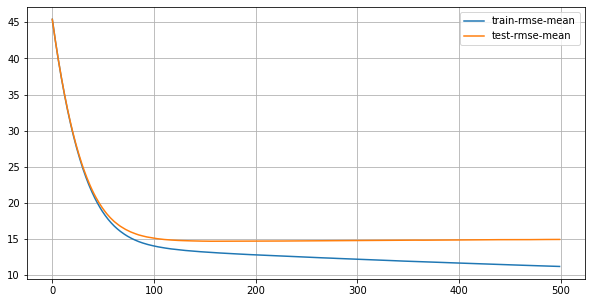

In [35]:
## Select final number of estimators
params = {'eta':0.025, 'seed':100, 
         'max_depth':2, 'min_child_weight':5, 'subsample':0.8, 'objective':'reg:squarederror'}

## Run CV to determine the number of round
CVRun = xgb.cv(
            params=params,
            dtrain=xgb.DMatrix(X_train, label=y_train),
            num_boost_round=500,
            nfold=4,
            metrics='rmse',
            seed=100)

CVRun.drop(['train-rmse-std', 'test-rmse-std'], axis=1, inplace=True)
CVRun.plot(figsize = (10,5), grid = True)

In [36]:
## Selected 300 as the number of rounds to avoid over fitting

XGB_hyperparam = xgb.train(params, xgb.DMatrix(X_train, label=y_train), 130)
add_results(XGB_hyperparam.predict(xgb.DMatrix(X_test)), "XGB_Hyperparam_lyrics")

{'XGB_Base_lyrics': 15.540270267920054, 'XGB_Base_lyrics_nonzero': 15.18519015356739, 'XGB_Hyperparam_lyrics': 15.085423427932012}


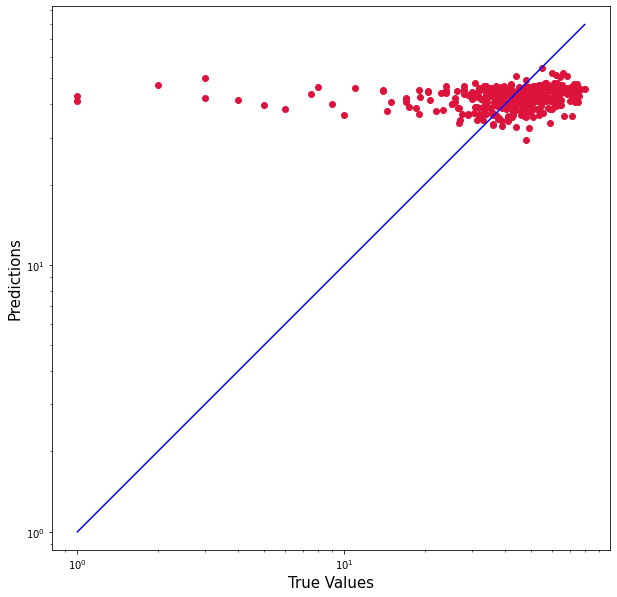

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, XGB_hyperparam.predict(xgb.DMatrix(X_test)), c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(XGB_hyperparam.predict(xgb.DMatrix(X_test))), max(y_test))
p2 = min(min(XGB_hyperparam.predict(xgb.DMatrix(X_test))), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()